In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
#Read in csv file
df = pd.read_csv("election_data.csv")

#Filter for 2012 and 2016
df_2012 = df[df["year"] == 2012]
df_2016 = df[df["year"] == 2016]

In [17]:
#Create pivot table with candidates as columns and votes as vales
pivot_2012 = df_2012.pivot(columns = "candidate", values = "candidatevotes")

#Merge pivot table with original 2012 dataframe
merged_2012 = df_2012.merge(pivot_2012, right_index=True, left_index=True)

#Group by state and county and sum (this allows all votes to be on same row)
merged_grouped_2012 = merged_2012.groupby(["state", "county"]).sum()

#Select last three rows and transform to ints
election_2012 = merged_grouped_2012.iloc[:,-3:].astype(int)

#Create total votes column
election_2012["Total Votes"] = election_2012.sum(1)

#Create column for winner and margin of victory
election_2012["Winner"] = np.where(election_2012['Barack Obama']>election_2012["Mitt Romney"], 'Barack Obama', 'Mitt Romney')
election_2012["Margin"] = np.where(election_2012["Winner"]=="Mitt Romney", 
                                   election_2012["Mitt Romney"]-election_2012["Barack Obama"],
                                   election_2012["Barack Obama"]-election_2012["Mitt Romney"])
#Preview results
election_2012.head()


Barack Obama  Mitt Romney  Other  Total Votes        Winner  \
state   county                                                                 
Alabama Autauga          6363        17379    190        23932   Mitt Romney   
        Baldwin         18424        66016    898        85338   Mitt Romney   
        Barbour          5912         5550     47        11509  Barack Obama   
        Bibb             2202         6132     86         8420   Mitt Romney   
        Blount           2970        20757    279        24006   Mitt Romney   

                 Margin  
state   county           
Alabama Autauga   11016  
        Baldwin   47592  
        Barbour     362  
        Bibb       3930  
        Blount    17787

In [18]:
#Find total votes for Barack Obama 2012
obama_total = election_2012["Barack Obama"].sum()

#Find total votes for Mitt Romney 2012
romney_total = election_2012["Mitt Romney"].sum()

#Find total votes for Other 2012
other_2012_total = election_2012["Other"].sum()


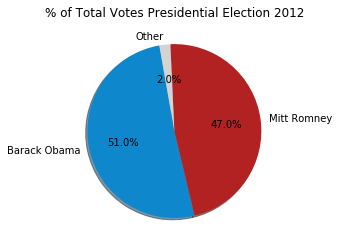

In [19]:
#Add labels
labels_2012 = ["Barack Obama", "Mitt Romney", "Other"]

#Add title
plt.title("% of Total Votes Presidential Election 2012")

#Set the values of each section of the pie chart
sizes_2012 = [obama_total, romney_total, other_2012_total]

#Set the colors of each section of the pie chart
colors_2012 = ["#0e87cc", "firebrick", "lightgray" ]

# Create the pie chart based upon the values above
plt.pie(sizes_2012, labels=labels_2012, colors=colors_2012,
        autopct="%1.1f%%", shadow=True, startangle=100)

#Show pie chart
plt.show()

In [101]:
#Create pivot table with candidates as columns and votes as vales
pivot_2016 = df_2016.pivot(columns = "candidate", values = "candidatevotes")

#Merge pivot table with original 2016 dataframe
merged_2016 = df_2016.merge(pivot_2016, right_index=True, left_index=True)

#Group by state and county and sum (this allows all votes to be on same row)
merged_grouped_2016 = merged_2016.groupby(["state", "county"]).sum()

#Select last three rows and transform to ints
election_2016 = merged_grouped_2016.iloc[:,-3:].astype(int)

#Create total votes column
election_2016["Total Votes"] = election_2016.sum(1)

#Create column for winner and margin of victory
election_2016["Winner"] = np.where(election_2016['Hillary Clinton']>election_2016["Donald Trump"], 'Hillary Clinton', 'Donald Trump')
election_2016["Margin"] = np.where(election_2016["Winner"]=="Donald Trump", 
                                   election_2016["Donald Trump"]-election_2016["Hillary Clinton"],
                                   election_2016["Hillary Clinton"]-election_2016["Donald Trump"])
#Preview results
election_2016.head()


Donald Trump  Hillary Clinton  Other  Total Votes  \
state   county                                                       
Alabama Autauga         18172             5936    865        24973   
        Baldwin         72883            18458   3874        95215   
        Barbour          5454             4871    144        10469   
        Bibb             6738             1874    207         8819   
        Blount          22859             2156    573        25588   

                       Winner  Margin  
state   county                         
Alabama Autauga  Donald Trump   12236  
        Baldwin  Donald Trump   54425  
        Barbour  Donald Trump     583  
        Bibb     Donald Trump    4864  
        Blount   Donald Trump   20703

In [73]:
#Find total votes for Donald Trump 2016
trump_total = election_2016["Donald Trump"].sum()

#Find total votes for Hillary Clinton 2016
clinton_total = election_2016["Hillary Clinton"].sum()

#Find total votes for Other 2016
other_2016_total = election_2016["Other"].sum()

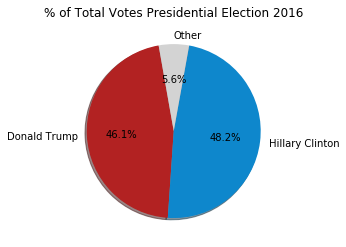

In [74]:
#Add labels
labels_2016 = ["Donald Trump", "Hillary Clinton", "Other"]

#Add title
plt.title("% of Total Votes Presidential Election 2016")

#Set the values of each section of the pie chart
sizes_2016 = [trump_total, clinton_total, other_2016_total]

#Set the colors of each section of the pie chart
colors_2016 = ["firebrick", "#0e87cc", "lightgray" ]

# Create the pie chart based upon the values above
plt.pie(sizes_2016, labels=labels_2016, colors=colors_2016,
        autopct="%1.1f%%", shadow=True, startangle=100)

#Show pie chart
plt.show()

In [82]:
#Join 2012 and 2016 dataframes
election_df = election_2012.join(election_2016, rsuffix = "_2016", lsuffix="_2012")

#Create column for percent change between total votes in 2012 and 2016
election_df["Total_Votes_Percent_Change"] = round((election_df["Total Votes_2016"] - election_df["Total Votes_2012"]) / election_df["Total Votes_2012"] * 100,2)

#Show results
election_df.head(10)

#export as CSV
election_df.reset_index().to_csv("2012_2016_election.csv")

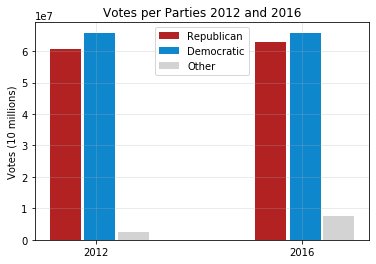

In [79]:
republican = (romney_total, trump_total)
democratic = (obama_total, clinton_total)
other = (other_2012_total, other_2016_total)

#The x locations for the groups
ind = np.arange(len(democratic)) 

#The width of the bars
width = 0.15  

#Create the bars
fig, ax = plt.subplots()
rects1 = plt.bar(ind - width, republican, width, label='Republican', color="firebrick")
rects2 = plt.bar(ind + width/9, democratic, width, label='Democratic', color="#0e87cc")
rects3 = plt.bar(ind + width*1.2, other, width, label='Other', color="lightgray")

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Votes (10 millions)')
plt.title('Votes per Parties 2012 and 2016')

#Add legend
plt.legend(loc= "upper center")

#Add grid
plt.grid(alpha= 0.3)

#Set ticks
plt.xticks(ind)

#Add tick labels
ax.set_xticklabels(('2012', '2016'))

#Show bar chart
plt.show()

In [77]:
#Store number of counties that changed parties between 2012 and 2016
Dem_Rep = len(election_df[(election_df.Winner_2012 == "Barack Obama") & (election_df.Winner_2016 == "Donald Trump")])
Rep_Dem = len(election_df[(election_df.Winner_2012 == "Mitt Romney") & (election_df.Winner_2016 == "Hillary Clinton")])

#NEED TO CREATE A CHART HERE

228

In [81]:
#Create dataframe for counties than switched
rep_dem_df = election_df[(election_df.Winner_2012 == "Mitt Romney") & (election_df.Winner_2016 == "Hillary Clinton")]
dem_rep_df = election_df[(election_df.Winner_2012 == "Barack Obama") & (election_df.Winner_2016 == "Donald Trump")]

In [89]:
#Read in demographic data
demo_df = pd.read_csv("demographic_data.csv")

#Split data in county on the comma, replace "county" with ""
demo_df['county'] = demo_df['county'].str.split(',').str[0]
demo_df["county"] = demo_df.county.str.replace(" County", "",)

#Group data, export if necessary
grouped_demo = demo_df.groupby(["state", "county"]).sum()
#grouped_demo.reset_index().to_csv("grouped_demo.csv")

In [102]:
#Read in clean data
election = pd.read_csv("2012_2016_election_clean.csv")
demographics = pd.read_csv("demo_clean.csv")

#Replace "Parish" with ""
demographics["county"] = demographics.county.str.replace(" Parish", "")


3109


In [119]:
#Merge dataframes
election_merged = pd.merge(election, demographics)

#Show preview
election_merged.head()


,state,county,Barack Obama,Mitt Romney,Other_2012,Total Votes_2012,Winner_2012,Margin_2012,Donald Trump,Hillary Clinton,...,white,black,hispanic,asian,farming_fishing_and_forestry_occupations,construction_extraction_maintenance_and_repair_occupations,management_professional_and_related_occupations,production_transportation_and_material_moving_occupations,sales_and_office_occupations,service_occupations
0,Alabama,Autauga,6363,17379,190,23932,Mitt Romney,11016,18172,5936,...,77.55,17.70,2.20,0.75,0.50,11.20,29.40,13.55,28.90,16.35
1,Alabama,Baldwin,18424,66016,898,85338,Mitt Romney,47592,72883,18458,...,84.30,9.55,3.65,0.65,0.85,12.35,31.10,10.90,27.40,17.40
2,Alabama,Barbour,5912,5550,47,11509,Barack Obama,362,5454,4871,...,47.40,46.50,4.70,0.25,2.05,8.95,26.15,27.90,20.10,14.90
3,Alabama,Bibb,2202,6132,86,8420,Mitt Romney,3930,6738,1874,...,75.20,22.50,1.35,0.15,0.60,18.05,20.25,25.00,22.65,13.55
4,Alabama,Blount,2970,20757,279,24006,Mitt Romney,17787,22859,2156,...,89.15,1.05,7.70,0.30,1.20,15.85,24.10,17.90,24.80,16.15


In [122]:
election_merged.groupby(["Winner_2016"]).mean().T

Winner_2016,Donald Trump,Hillary Clinton
Barack Obama,8778.665521,87651.987552
Mitt Romney,13532.471172,51718.379668
Other_2012,447.513173,2972.570539
Total Votes_2012,22758.649866,142342.937759
Margin_2012,5184.086674,36947.591286
Donald Trump,14748.554410,49928.721992
Hillary Clinton,8042.799542,91959.323651
Other_2016,1340.669721,8486.437759
Total Votes_2016,24132.023673,150374.483402
Margin_2016,6705.754868,42030.601660
